In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
data=pd.read_csv('car_evaluation.csv',header=None)

In [45]:
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [46]:
data.shape

(1728, 7)

In [47]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [48]:
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns=col_names
data.columns        
           

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [50]:
for col in col_names:
    print(data[col].value_counts())

low      432
high     432
vhigh    432
med      432
Name: buying, dtype: int64
low      432
high     432
vhigh    432
med      432
Name: maint, dtype: int64
4        432
3        432
2        432
5more    432
Name: doors, dtype: int64
4       576
2       576
more    576
Name: persons, dtype: int64
big      576
med      576
small    576
Name: lug_boot, dtype: int64
low     576
high    576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [51]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [52]:
x=data.drop(['class'],axis=1)
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [53]:
y=data['class']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=5)


In [36]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,x_train.shape[1]):
    if x_train.dtypes[i]=='object':
        x_train[x_train.columns[i]] = le.fit_transform(x_train[x_train.columns[i]])

<ipython-input-37-ea5e59b5db7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[x_train.columns[i]] = le.fit_transform(x_train[x_train.columns[i]])


In [40]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1371,1,3,2,2,1,1
841,0,1,3,0,1,2
1095,2,2,0,1,0,1
1683,1,1,2,1,2,1
292,3,2,2,2,1,2


In [39]:
x_train.shape[1]

6

In [41]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
805,high,low,3,more,med,med
50,vhigh,vhigh,3,more,med,high
1171,med,med,5more,4,small,med
1177,med,med,5more,4,big,med
395,vhigh,low,4,4,big,high


In [55]:
print(x_test.dtypes[0])

object


In [56]:
for i in range(0,x_test.shape[1]):
    if x_test.dtypes[i]=='object':
        x_test[x_test.columns[i]] = le.fit_transform(x_test[x_test.columns[i]])

<ipython-input-56-43a027423e52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[x_test.columns[i]] = le.fit_transform(x_test[x_test.columns[i]])


In [58]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
805,0,1,1,2,1,2
50,3,3,1,2,1,0
1171,2,2,3,1,2,2
1177,2,2,3,1,0,2
395,3,1,2,1,0,0


In [59]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [60]:
y_pred=clf.predict(x_test)

In [61]:
y_pred

array(['acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'acc'], dtype=object)

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.7666666666666667


In [64]:
y_pred_training=clf.predict(x_train)
print(accuracy_score(y_pred_training,y_train))

0.826266195524146


In [65]:
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Training set score: 0.8263
Test set score: 0.7667


Here, the training-set accuracy score is 0.8263 while the test-set accuracy to be 0.7667 These two values are quite comparable. So, there is no sign of overfitting.

[Text(306.90000000000003, 391.392, 'X[3] <= 0.5\nentropy = 1.207\nsamples = 1698\nvalue = [375, 69, 1190, 64]'),
 Text(251.10000000000002, 304.416, 'entropy = 0.0\nsamples = 565\nvalue = [0, 0, 565, 0]'),
 Text(362.70000000000005, 304.416, 'X[5] <= 0.5\nentropy = 1.481\nsamples = 1133\nvalue = [375, 69, 625, 64]'),
 Text(223.20000000000002, 217.44, 'X[0] <= 2.5\nentropy = 1.686\nsamples = 376\nvalue = [201, 30, 81, 64]'),
 Text(111.60000000000001, 130.464, 'X[0] <= 0.5\nentropy = 1.661\nsamples = 284\nvalue = [157, 30, 33, 64]'),
 Text(55.800000000000004, 43.488, 'entropy = 0.836\nsamples = 94\nvalue = [69, 0, 25, 0]'),
 Text(167.4, 43.488, 'entropy = 1.656\nsamples = 190\nvalue = [88, 30, 8, 64]'),
 Text(334.8, 130.464, 'X[1] <= 0.5\nentropy = 0.999\nsamples = 92\nvalue = [44, 0, 48, 0]'),
 Text(279.0, 43.488, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 23, 0]'),
 Text(390.6, 43.488, 'entropy = 0.945\nsamples = 69\nvalue = [44, 0, 25, 0]'),
 Text(502.20000000000005, 217.44, 'X[5] <= 

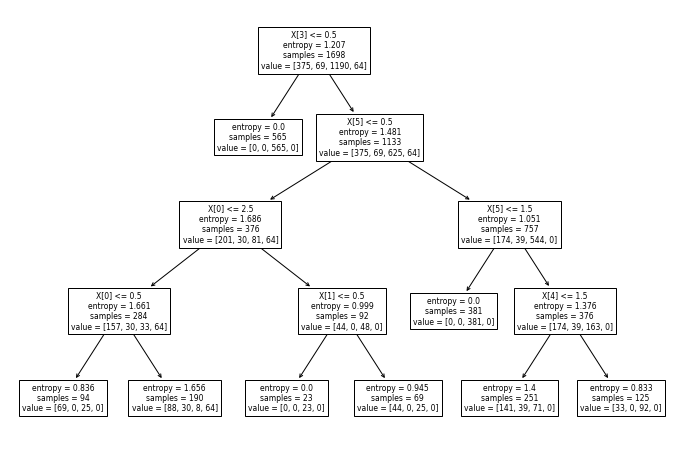

In [69]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(x_train,y_train))


In [70]:
from sklearn.metrics  import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [71]:
cm


array([[ 7,  2,  0],
       [ 4, 16,  0],
       [ 1,  0,  0]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.58      0.78      0.67         9
       unacc       0.89      0.80      0.84        20
       vgood       0.00      0.00      0.00         1

    accuracy                           0.77        30
   macro avg       0.49      0.53      0.50        30
weighted avg       0.77      0.77      0.76        30



c:\python-3.9\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python-3.9\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python-3.9\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
